In [1]:
# identify hand-written digits

In [3]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
dir(digits) # properties of the dataset

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

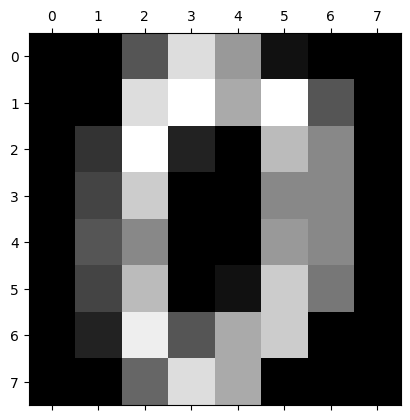

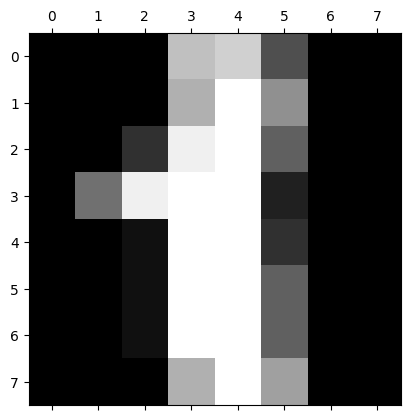

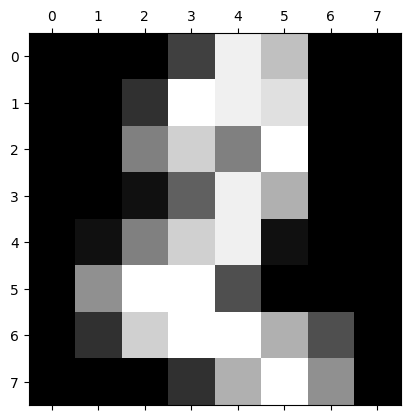

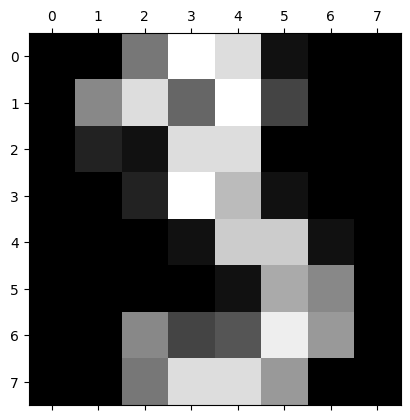

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [10]:
# creating a dataframe for the dataset
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [12]:
X = df.drop('target',axis='columns')
y = df.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [14]:
len(X_train)

1437

In [15]:
len (X_test)

360

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20) # ie 20 random trees
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [19]:
model.score(X_test, y_test)

0.9638888888888889

In [20]:
y_predicted = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted) # truth, then prediction
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 39,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  2,  0,  0,  2,  0],
       [ 0,  1,  0,  0, 25,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 27,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 41]])

Text(95.72222222222221, 0.5, 'Truth')

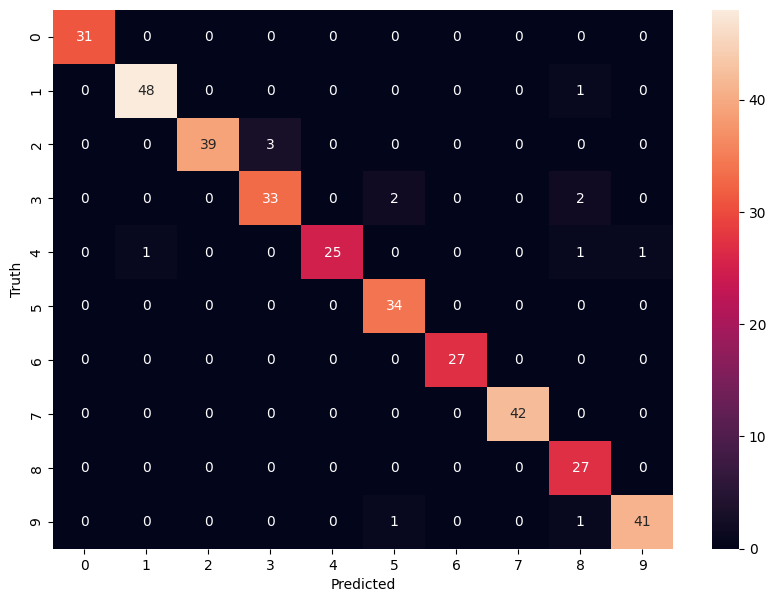

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Predicted: 8
Actual: 8


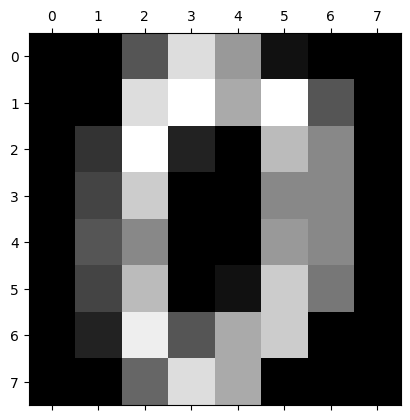

In [24]:
# predict values for X_test 
y_pred = model.predict(X_test)

print(f'Predicted: {y_pred[0]}')
print(f'Actual: {y_test.values[0]}')

# visualize the image of the first test sample
plt.matshow(digits.images[0])

Predicted: 8
Actual: 8


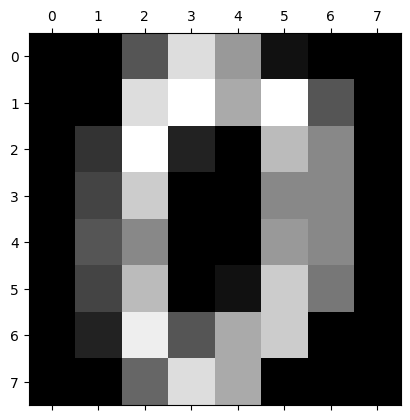

Predicted: 1
Actual: 1


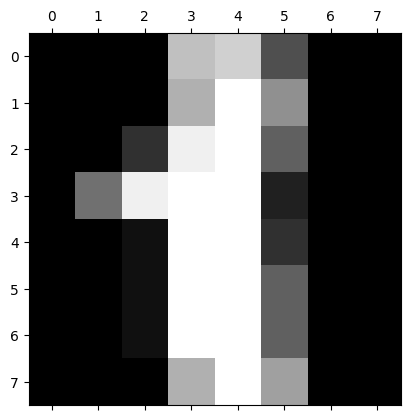

Predicted: 0
Actual: 0


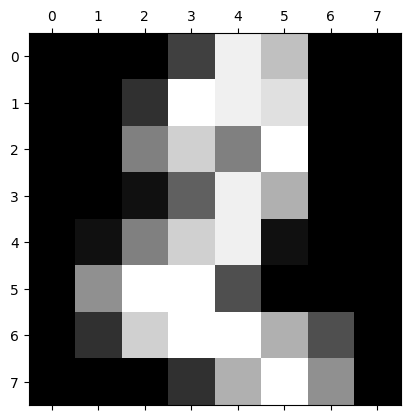

Predicted: 8
Actual: 8


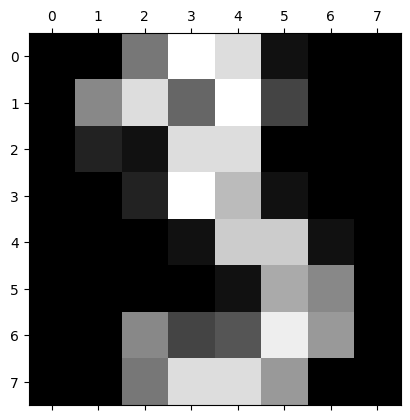

Predicted: 9
Actual: 9


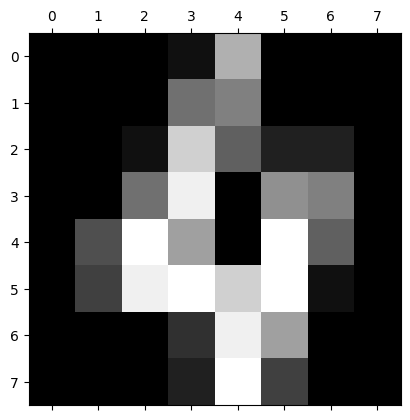

In [25]:
y_pred = model.predict(X_test)

for i in range(5):
    print(f'Predicted: {y_pred[i]}')
    print(f'Actual: {y_test.values[i]}')
    
    plt.matshow(digits.images[i])  # displaying the first 5 images from the original dataset
    plt.show()